In [317]:
import pandas as pd

#filepath = 'https://raw.githubusercontent.com/LondonEnergyMap/cleandata/master/epc/domestic/epc_postcodesample.csv'
filepath = 'epc_postcodefull.csv'
# filepath = 'https://media.githubusercontent.com/media/LondonEnergyMap/cleandata/master/epc/domestic/epc_postcodefull.csv'

df = pd.read_csv(filepath, low_memory=False)
df.head()

,key,add1,add2,add3,pcode,bref,curr_enr,poten_enr,prop_type,builtform,...,gascons,gasmeters,gasavg,gasmid,gasmatch,eleccons,elecmeters,elecavg,elecmid,elecmatch
0,61487520080112090145,"Apartment 73, Globe View","10, High Timber Street",NaN,EC4V 3PQ,6648304468,B,B,Flat,Enclosed End-Terrace,...,44272.007913,8,5534.0009891,3274.975272,exact,44841.2,11,4076.4727273,3173.2,exact
1,301557720090610090603,Apartment 75 Globe View,"10, High Timber Street",NaN,EC4V 3PQ,7191803668,B,B,Flat,Mid-Terrace,...,44272.007913,8,5534.0009891,3274.975272,exact,44841.2,11,4076.4727273,3173.2,exact
2,323328920090709090741,Apartment 74 Globe View,"10, High Timber Street",NaN,EC4V 3PQ,1185564668,B,B,Flat,Detached,...,44272.007913,8,5534.0009891,3274.975272,exact,44841.2,11,4076.4727273,3173.2,exact
3,479386320100504100556,Apartment 77 Globe View,"10, High Timber Street",NaN,EC4V 3PQ,631555768,B,B,Flat,End-Terrace,...,44272.007913,8,5534.0009891,3274.975272,exact,44841.2,11,4076.4727273,3173.2,exact
4,496530220100609110604,Apartment 78 Globe View,"10, High Timber Street",NaN,EC4V 3PQ,7217676768,B,B,Flat,Mid-Terrace,...,44272.007913,8,5534.0009891,3274.975272,exact,44841.2,11,4076.4727273,3173.2,exact


In [364]:
df.shape

(1824983, 68)

In [365]:
dfexact = df[(df.gasmatch.str.contains('exact')) & (df.elecmatch.str.contains('exact'))]
dfexact.shape

(1497538, 68)

In [366]:
dfexact.gasmeters.describe()

count     1497538
unique        128
top            24
freq        40103
Name: gasmeters, dtype: object

In [367]:
df.dtypes

key                  object
add1                 object
add2                 object
add3                 object
pcode                object
bref                  int64
curr_enr             object
poten_enr            object
prop_type            object
builtform            object
insp_date            object
localauth_code       object
constit_code         object
transact_type        object
curr_encons           int64
poten_encons          int64
curr_co2            float64
curr_co2perarea     float64
poten_co2           float64
tfa                 float64
mainsgas             object
flvl                 object
flattop              object
flattop_cnt           int64
mainheatcontrol      object
glaze_percent         int64
glaze_type           object
glaze_area           object
nextension            int64
nrooms                int64
                     ...   
window_eff           object
wall                 object
wall_eff             object
heat2                object
heat2_eff           

<function matplotlib.pyplot.show(*args, **kw)>

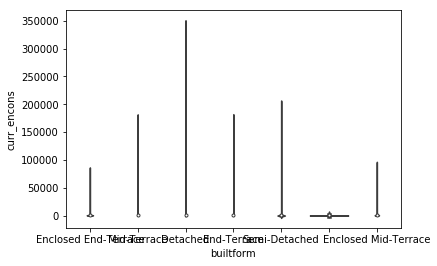

In [368]:
# statistical distribution graphs for different builtform

import seaborn as sns
from matplotlib import pyplot as plt

temp = df[(~df.builtform.str.contains('DATA'))]
sns.violinplot(data=temp, x='builtform', y='curr_encons')
plt.show

In [369]:
df.prop_type.unique()

array(['Flat', 'House', 'Maisonette', 'Bungalow', 'Park home'],
      dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

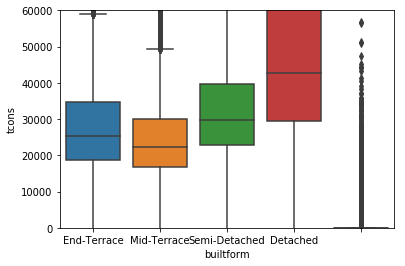

In [370]:
t = df[(df.prop_type.str.contains('House')) & (~df.builtform.str.contains('DATA')) & (~df.builtform.str.contains('Enclosed'))]
temp = t.copy()
temp['tcons'] = temp.curr_encons*temp.tfa
sns.boxplot(data=temp, x='builtform', y='tcons')
plt.ylim([0,60000])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

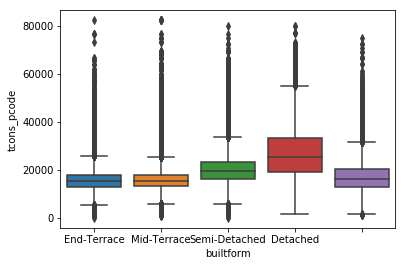

In [371]:
t = df[(df.prop_type.str.contains('House')) & (~df.builtform.str.contains('DATA')) & (~df.builtform.str.contains('Enclosed'))]
temp = t.copy()
temp['gasmid'] = pd.to_numeric(temp.gasmid, errors='coerce')
temp['elecmid'] = pd.to_numeric(temp.elecmid, errors='coerce')

temp['tcons_pcode'] = temp.gasmid + temp.elecmid

sns.boxplot(data=temp, x='builtform', y='tcons_pcode')
plt.show

In [372]:
df['builtform'] = df.builtform.str.replace('NO DATA!', '', n=-1, regex=True)
df['form'] = df.builtform + ' ' + df.prop_type
df.form.unique()

array(['Enclosed End-Terrace Flat', 'Mid-Terrace Flat', 'Detached Flat',
       'End-Terrace Flat', 'Semi-Detached Flat', ' Flat',
       'End-Terrace House', 'Enclosed Mid-Terrace Flat',
       'Mid-Terrace House', 'Mid-Terrace Maisonette',
       'Detached Maisonette', 'Enclosed Mid-Terrace Maisonette',
       ' Maisonette', 'Semi-Detached House', 'Enclosed Mid-Terrace House',
       'Enclosed End-Terrace House', 'End-Terrace Maisonette',
       'Semi-Detached Maisonette', 'Detached House',
       'End-Terrace Bungalow', 'Mid-Terrace Bungalow',
       'Semi-Detached Bungalow', ' House', 'Detached Bungalow',
       'Enclosed End-Terrace Maisonette', ' Bungalow',
       'Enclosed End-Terrace Bungalow', 'Enclosed Mid-Terrace Bungalow',
       'Detached Park home'], dtype=object)

In [373]:
# set a categorial list to sort the combined house types

sortforms = [
 ' House', 
 'Detached House', 
 'Semi-Detached House',     
 'End-Terrace House',
 'Mid-Terrace House',
 'Enclosed Mid-Terrace House',
 'Enclosed End-Terrace House',
 ' Bungalow', 
 'Detached Bungalow', 
 'Semi-Detached Bungalow',     
 'End-Terrace Bungalow',
 'Mid-Terrace Bungalow',
 'Enclosed Mid-Terrace Bungalow',
 'Enclosed End-Terrace Bungalow',
 ' Maisonette', 
 'Detached Maisonette', 
 'Semi-Detached Maisonette',     
 'End-Terrace Maisonette',
 'Mid-Terrace Maisonette',
 'Enclosed Mid-Terrace Maisonette',
 'Enclosed End-Terrace Maisonette',
 ' Flat', 
 'Detached Flat', 
 'Semi-Detached Flat',     
 'End-Terrace Flat',
 'Mid-Terrace Flat',
 'Enclosed Mid-Terrace Flat',
 'Enclosed End-Terrace Flat',
 'Detached Park home'
 ]

df['form'] = pd.Categorical(df['form'], sortforms)

<function matplotlib.pyplot.show(*args, **kw)>

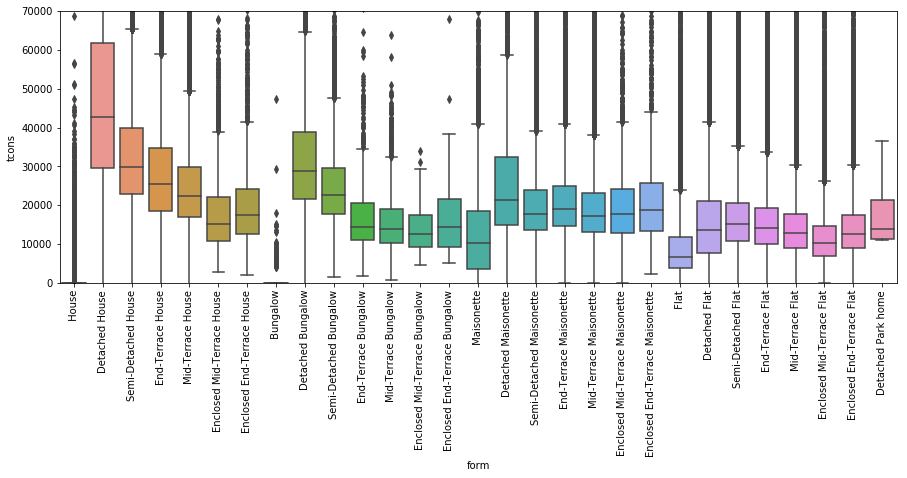

In [374]:
# combined property types TOTAL estimated energy consumption
temp = df.copy()

temp['tcons'] = temp.curr_encons*temp.tfa
plt.figure(figsize=(15, 5))
g = sns.boxplot(data=temp, x='form', y='tcons')
plt.ylim([0,70000])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

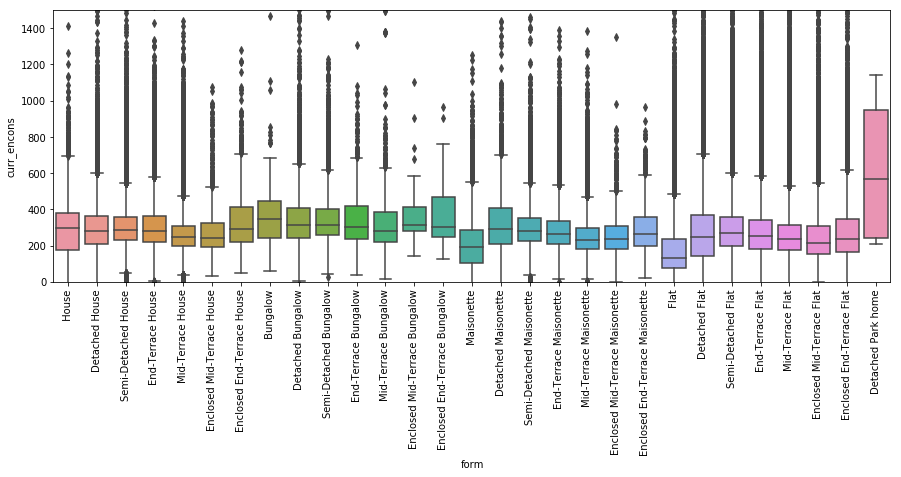

In [375]:
# combined property types PER AREA estimated energy consumption
temp = df.copy()


plt.figure(figsize=(15, 5))
g = sns.boxplot(data=temp, x='form', y='curr_encons')
plt.ylim([0,1500])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

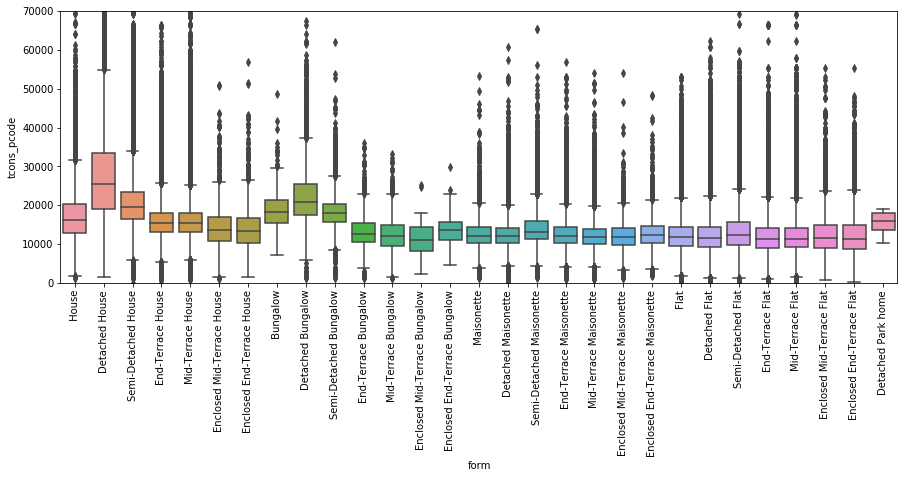

In [376]:
# combined property types TOTAL POSTCODE energy consumption
temp = df.copy()

temp['gasmid'] = pd.to_numeric(temp.gasmid, errors='coerce')
temp['elecmid'] = pd.to_numeric(temp.elecmid, errors='coerce')
temp['tcons_pcode'] = temp.gasmid + temp.elecmid

plt.figure(figsize=(15, 5))
g = sns.boxplot(data=temp, x='form', y='tcons_pcode')
plt.ylim([0,70000])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

/Users/dora/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4406: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/dora/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/Users/dora/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/Users/dora/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/Users/dora/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)
/Users/dora/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1847: Run

<function matplotlib.pyplot.show(*args, **kw)>

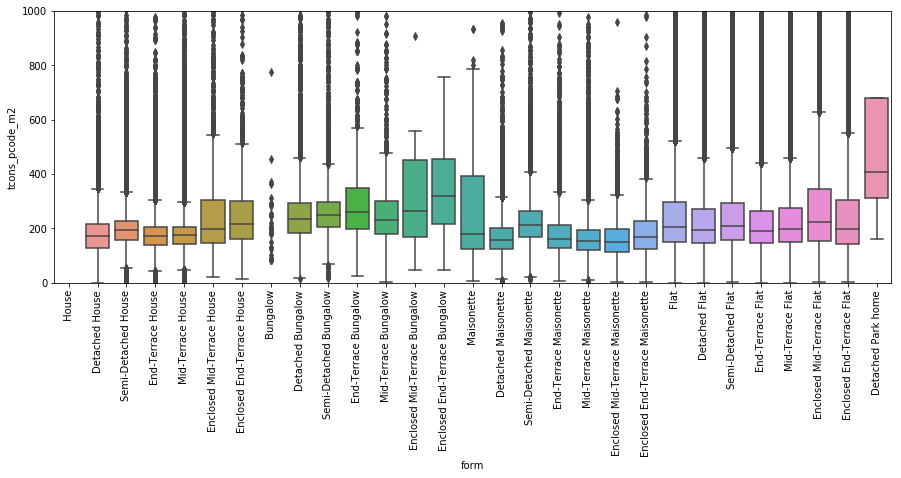

In [377]:
# combined property types PER AREA POSTDOE energy consumption

temp['tcons_pcode_m2'] = temp['tcons_pcode']/temp['tfa']

plt.figure(figsize=(15, 5))
g = sns.boxplot(data=temp, x='form', y='tcons_pcode_m2')
plt.ylim([0,1000])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

In [378]:
temp['gasmeters'] = df['gasmeters'].astype('float32')

In [379]:
ran = temp.gasmeters.describe()

In [380]:
ran

count    1.738814e+06
mean     8.652112e+01
std      1.591027e+02
min      6.000000e+00
25%      2.200000e+01
50%      3.600000e+01
75%      5.400000e+01
max      1.112000e+03
Name: gasmeters, dtype: float64

In [381]:
temp = df[(df.gasmatch.str.contains('exact')) & (df.elecmatch.str.contains('exact'))]
temp = temp[temp.gasmeters.notnull()]
temp['gasmeters'] = temp['gasmeters'].astype('float32')
temp['elecmeters'] = temp['elecmeters'].astype('float32')

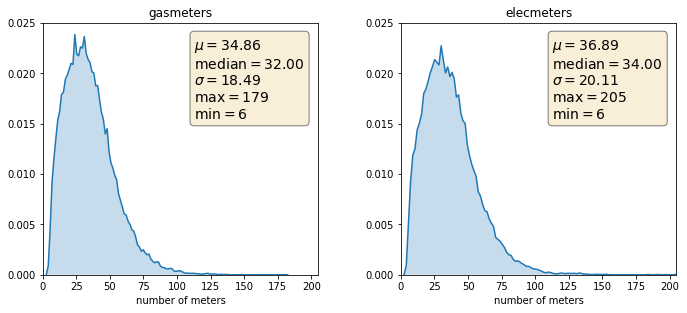

In [382]:
import numpy as np

# create 2 subplots for postcode matched meters distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
meters = ['gasmeters', 'elecmeters']
# set x axis limit as maximum of the 2 columns
xl = temp[meters].values.max()

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

xpos = 0.55
ypos = 0.95

for i in range(2):  
    # draw the distribution
    sns.kdeplot(temp[meters[i]], shade=True, legend=False, ax=ax[i])
    ax[i].set_title(temp[meters[i]].name)
    ax[i].set_xlabel('number of meters')
    ax[i].set_xlim(0, xl)
    ax[i].set_ylim(0, 0.025)
    
    # place a text box in upper left in axes coords
    x = temp[meters[i]]
    mu = x.mean()
    median = np.median(x)
    sigma = x.std()
    maxx = x.max()
    minn = x.min()
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, ),
        r'$\max=%.f$' % (maxx, ),
        r'$\min=%.f$' % (minn, )))    
    ax[i].text(xpos, ypos, textstr, transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9, wspace=0.3, hspace=0.2)
plt.savefig('meters.png')
plt.show()


In [383]:
stats = temp.gasmeters.describe()

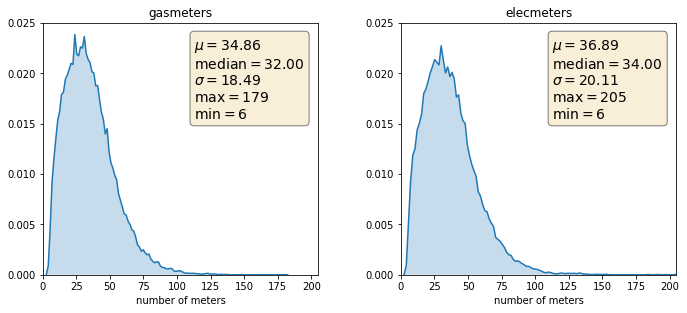

In [385]:
# create 2 subplots for postcode matched meters distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
meters = ['gasmeters', 'elecmeters']
# set x axis limit as maximum of the 2 columns
xl = temp[meters].values.max()

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

xpos = 0.55
ypos = 0.95

for i in range(2):  
    # draw the distribution
    sns.kdeplot(temp[meters[i]], shade=True, legend=False, ax=ax[i])
    ax[i].set_title(temp[meters[i]].name)
    ax[i].set_xlabel('number of meters')
    ax[i].set_xlim(0, xl)
    ax[i].set_ylim(0, 0.025)
    
    # place a text box in upper left in axes coords
    stats = temp[meters[i]].describe()
    mu = stats[1]
    median = stats[5]
    sigma = stats[2]
    maxx = stats[7]
    minn = stats[3]
    textstr = '\n'.join((
        r'$\mu=%.2f$' % (mu, ),
        r'$\mathrm{median}=%.2f$' % (median, ),
        r'$\sigma=%.2f$' % (sigma, ),
        r'$\max=%.f$' % (maxx, ),
        r'$\min=%.f$' % (minn, )))    
    ax[i].text(xpos, ypos, textstr, transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9, wspace=0.3, hspace=0.2)
plt.savefig('meters.png')
plt.show()


In [386]:
# check difference between mean and median in gas and electricity consumptions

temp['gasavg'] = temp['gasavg'].astype('float32')
temp['gasmid'] = temp['gasmid'].astype('float32')
temp['elecavg'] = temp['elecavg'].astype('float32')
temp['elecmid'] = temp['elecmid'].astype('float32')

temp['gasdif'] = temp.gasavg - temp.gasmid
temp['elecdif'] = temp.elecavg - temp.elecmid

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

meter_dist = ['gasdif', 'elecdif']
meter_disttitles = ['gas', 'electricity']

for i in range(2):
    sns.boxplot(y = temp[meter_dist[i]], ax=ax[i])
    ax[i].set_ylim(-2000, 2000)
    ax[i].set_ylabel('Consumption (average - median)')
    ax[i].set_title(meter_disttitles[i])
    
plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9, wspace=0.4, hspace=0.2)
plt.savefig('meters_skew.png')

In [388]:

temp2 = temp[temp.duplicated(subset='bref')]
temp.shape

(1497538, 70)

In [389]:
temp2.shape

(0, 70)

In [390]:
bflist = [
    'Detached', 
    'Semi-Detached', 
    'End-Terrace',
    'Mid-Terrace',   
    'Enclosed Mid-Terrace',    
    'Enclosed End-Terrace',     
    '']

temp['builtform'] = pd.Categorical(temp['builtform'], bflist)

In [391]:
# temp['tcons'] = temp.curr_encons*temp.tfa
# g = sns.boxplot(data=temp, x='builtform', y='tcons')
# g.set_xticklabels(g.get_xticklabels(), rotation=90)
# plt.show

In [392]:
#n = 10
#temp = temp[(temp.gasmeters<n) & (temp.elecmeters<n)]
#temp.shape

In [393]:
temp['tcons'] = temp.curr_encons*temp.tfa
new1 = temp[['builtform', 'prop_type', 'form', 'tfa', 'tcons']]
n1 = new1.copy()
n1['cons_type'] = 'epc'

In [394]:
temp['tcons_pcode'] = temp.gasmid + temp.elecmid
new2 = temp[['builtform', 'prop_type', 'form', 'tfa', 'tcons_pcode']]
new2.rename(columns={'tcons_pcode': 'tcons'}, inplace=True)
n2 = new2.copy()

/Users/dora/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [395]:
n2['cons_type'] = 'meter'

In [396]:
new = n1.append(n2)

In [397]:
new.head()

,builtform,prop_type,form,tfa,tcons,cons_type
0,Enclosed End-Terrace,Flat,Enclosed End-Terrace Flat,80.00,202240.00,epc
1,Mid-Terrace,Flat,Mid-Terrace Flat,63.81,8295.30,epc
2,Detached,Flat,Detached Flat,65.20,8867.20,epc
3,End-Terrace,Flat,End-Terrace Flat,60.16,8241.92,epc
4,Mid-Terrace,Flat,Mid-Terrace Flat,64.08,9227.52,epc


<function matplotlib.pyplot.show(*args, **kw)>

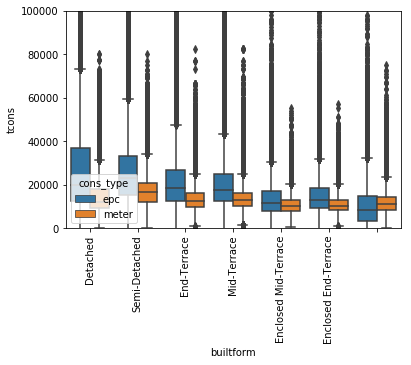

In [398]:

g = sns.boxplot(data=new, x='builtform', y='tcons', hue='cons_type')
g.set_ylim(0, 100000)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

In [399]:
ptlist = [
    'House', 
    'Bungalow', 
    'Maisonette',
    'Flat']

temp['prop_type'] = pd.Categorical(temp['prop_type'], ptlist)

<function matplotlib.pyplot.show(*args, **kw)>

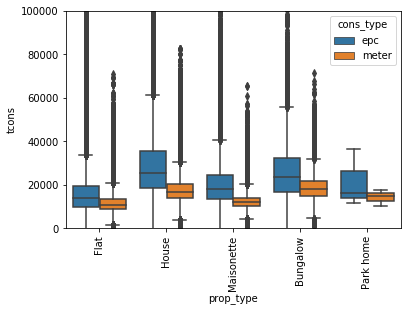

In [400]:
g = sns.boxplot(data=new, x='prop_type', y='tcons', hue='cons_type')
g.set_ylim(0, 100000)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

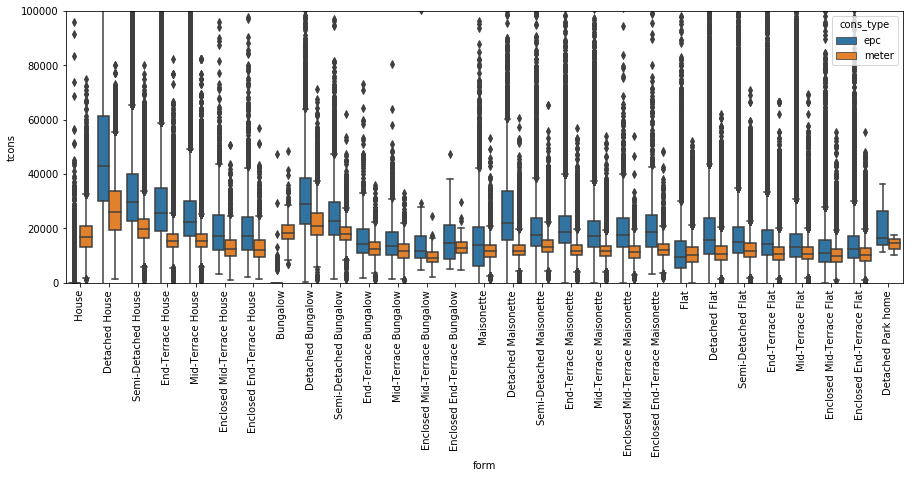

In [401]:
plt.figure(figsize=(15, 5))
g = sns.boxplot(data=new, x='form', y='tcons', hue='cons_type')
g.set_ylim(0, 100000)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show

(0, 100000)

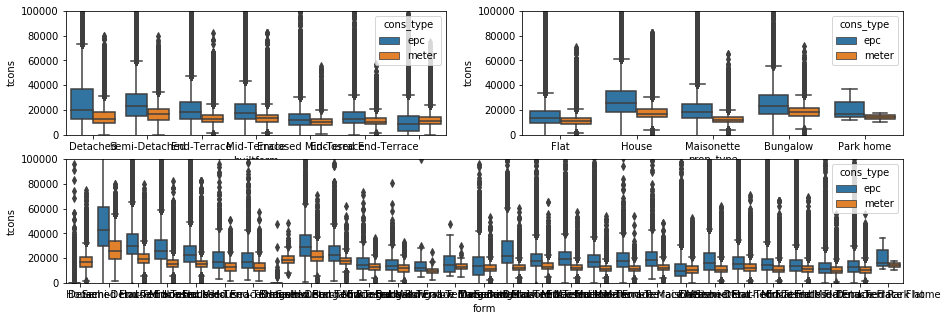

In [402]:
from matplotlib.gridspec import GridSpec

fig=plt.figure(figsize=(15,5))

gs=GridSpec(2,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,0]) # First row, first column
ax2=fig.add_subplot(gs[0,1]) # First row, second column
ax3=fig.add_subplot(gs[1,:]) # Second row, span all columns

g1 = sns.boxplot(data=new, x='builtform', y='tcons', hue='cons_type', ax=ax1)
g2 = sns.boxplot(data=new, x='prop_type', y='tcons', hue='cons_type', ax=ax2)
g3 = sns.boxplot(data=new, x='form', y='tcons', hue='cons_type', ax=ax3)
g1.set_ylim(0, 100000)
g2.set_ylim(0, 100000)
g3.set_ylim(0, 100000)

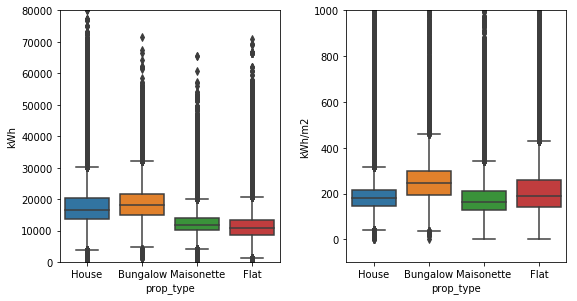

In [408]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

temp['tcons_pcodem2'] = temp.tcons_pcode/temp.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    sns.boxplot(data=temp, x='prop_type', y = temp[cons[i]], ax=ax[i])
    ax[0].set_ylim(-1000, 80000)   
    ax[1].set_ylim(-100, 1000)
    ax[i].set_ylabel(cons_ylabels[i])

plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9,
                        wspace=0.3, hspace=0.2)
plt.show()

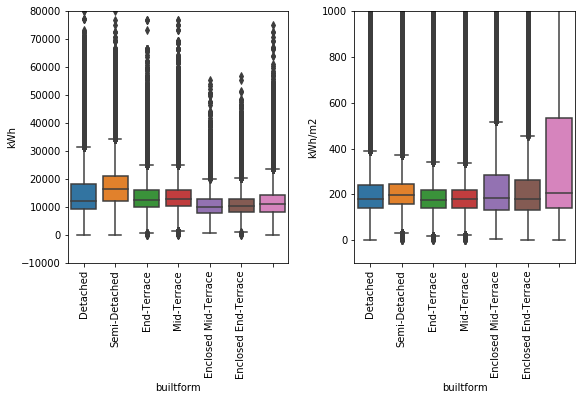

In [414]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

temp['tcons_pcodem2'] = temp.tcons_pcode/temp.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=temp, x='builtform', y = temp[cons[i]], ax=ax[i])
    ax[0].set_ylim(-10000, 80000)   
    ax[1].set_ylim(-100, 1000)
    ax[i].set_ylabel(cons_ylabels[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9,
                        wspace=0.3, hspace=0.2)
plt.show()

TypeError: cannot perform reduce with flexible type

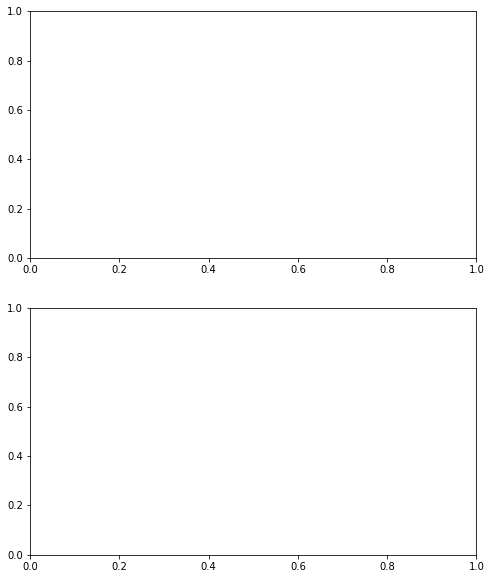

In [426]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

temp['tcons_pcodem2'] = temp.tcons_pcode/temp.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=temp, x='form', y = temp[cons[i]], ax=ax[i])
    ax[0].set_ylim(-10000, 80000)   
    ax[1].set_ylim(-100, 1000)
    ax[i].set_ylabel(cons_ylabels[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9,
                        wspace=0.3, hspace=0.2)
plt.show()

In [417]:
prop_mapping = {'House':0, 'Flat':-2, 'Bungalow':0.5, 'Maisonette':-2, 'Park home':0}
built_mapping = {'Detached':0, 'Mid-Terrace':-2, 'Semi-Detached':-1, 'Enclosed Mid-Terrace': -2.5, 'Enclosed End-Terrace': -1.5, '':0}


temp['propmap'] = temp.prop_type.map(prop_mapping)
temp['builtmap'] = temp.builtform.map(built_mapping)
temp['exposedsides'] = 6 + temp.propmap + temp.builtmap

In [418]:
temp.exposedsides.head()

0    2.5
1    2.0
2    4.0
3    NaN
4    2.0
Name: exposedsides, dtype: float64

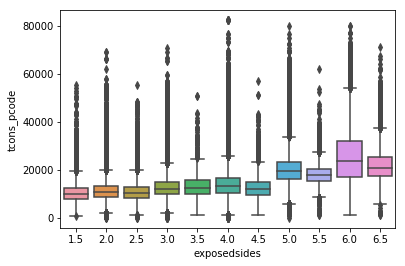

In [421]:
sns.boxplot(data=temp, x='exposedsides', y='tcons_pcode')

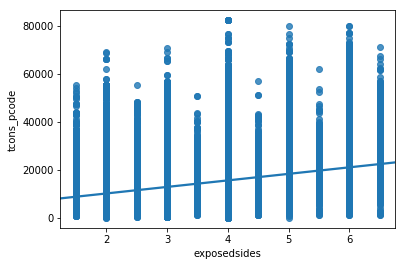

In [424]:
sns.regplot(data=temp, x='exposedsides', y='tcons_pcode')

(0, 1000)

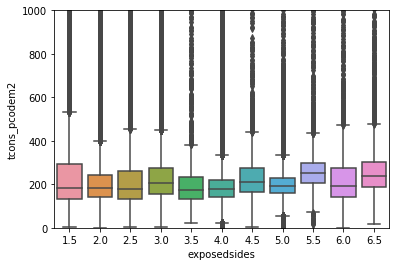

In [423]:
sns.boxplot(data=temp, x='exposedsides', y='tcons_pcodem2')
plt.ylim(0, 1000)

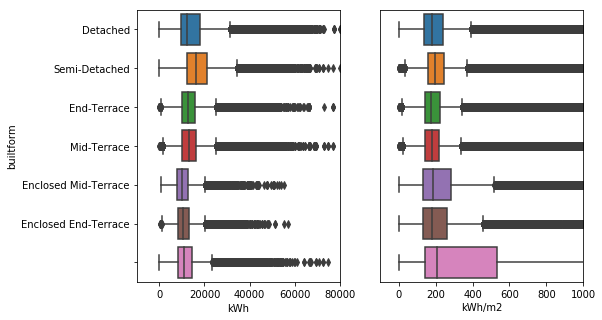

In [434]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

temp['tcons_pcodem2'] = temp.tcons_pcode/temp.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=temp, x = temp[cons[i]], y='builtform', ax=ax[i])
    ax[0].set_xlim(-10000, 80000)   
    ax[1].set_xlim(-100, 1000)
    ax[1].set_ylabel('')
    ax[1].set_yticks([])    
    ax[i].set_xlabel(cons_ylabels[i])
    
#     g.set_xticklabels(g.get_xticklabels(), rotation=90)

# plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9,
#                         wspace=0.3, hspace=0.2)
plt.show()

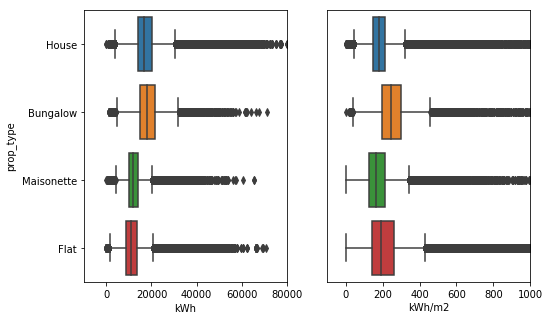

In [435]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

temp['tcons_pcodem2'] = temp.tcons_pcode/temp.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=temp, x = temp[cons[i]], y='prop_type', ax=ax[i])
    ax[0].set_xlim(-10000, 80000)   
    ax[1].set_xlim(-100, 1000)
    ax[1].set_ylabel('')
    ax[1].set_yticks([])    
    ax[i].set_xlabel(cons_ylabels[i])
    
#     g.set_xticklabels(g.get_xticklabels(), rotation=90)

# plt.subplots_adjust(left=0.07, bottom=0.2, right=0.95, top=0.9,
#                         wspace=0.3, hspace=0.2)
plt.show()

In [438]:
temp.nrooms.unique()

array([ 3,  4,  2, -1,  1,  5,  6, 10,  8,  7, 72, 16,  9, 13, 11, 12, 40,
       19, 18, 14, 15, 36, 17, 22, 61, 50, 30, 33, 20, 23, 99, 37, 44, 34,
       24, 21, 25, 26, 43, 90, 67, 51, 66, 83, 60, 87, 31,  0, 85, 55, 27,
       69, 54, 56, 70, 29, 68, 57, 58, 63, 39])

In [440]:
temp.nrooms.describe()

count    1.497538e+06
mean     3.490303e+00
std      2.017850e+00
min     -1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      9.900000e+01
Name: nrooms, dtype: float64

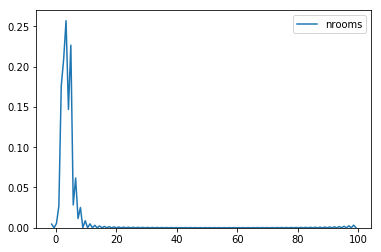

In [441]:
sns.kdeplot(temp.nrooms)

In [457]:
dfrooms = temp[(temp.nrooms<=20) & (temp.nrooms>0) ]

In [458]:
dfrooms.nrooms.unique()

array([ 3,  4,  2,  1,  5,  6, 10,  8,  7, 16,  9, 13, 11, 12, 19, 18, 14,
       15, 17, 20])

In [459]:
dfrooms.tcons_pcode.describe()

count    1.405307e+06
mean     1.431343e+04
std      6.433679e+03
min      9.891197e-01
25%      1.024942e+04
50%      1.325770e+04
75%      1.719589e+04
max      8.244310e+04
Name: tcons_pcode, dtype: float64

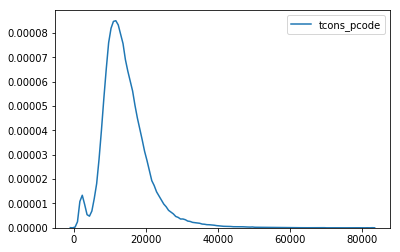

In [460]:
sns.kdeplot(dfrooms.tcons_pcode)

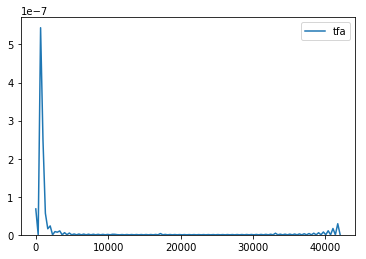

In [461]:
sns.kdeplot(dfrooms.tfa)

In [462]:
dfrooms.tfa.describe()

count    1.405307e+06
mean     8.027248e+01
std      6.699855e+01
min      0.000000e+00
25%      5.363000e+01
50%      7.149000e+01
75%      9.400000e+01
max      4.203910e+04
Name: tfa, dtype: float64

In [463]:
dfrooms.tfa.head()

0    80.00
1    63.81
2    65.20
3    60.16
4    64.08
Name: tfa, dtype: float64

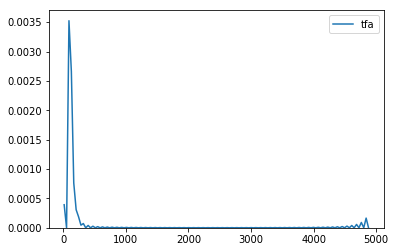

In [465]:
dfrooms = dfrooms[(dfrooms.tfa>=20) & (dfrooms.tfa<=5000)]
sns.kdeplot(dfrooms.tfa)

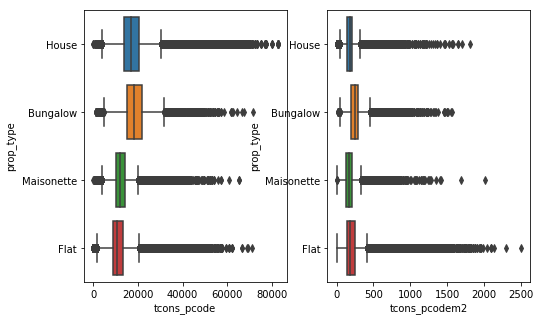

In [470]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

dfrooms['tcons_pcodem2'] = dfrooms.tcons_pcode/dfrooms.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=dfrooms, x = dfrooms[cons[i]], y='prop_type', ax=ax[i])
#     ax[0].set_xlim(-10000, 80000)   
#     ax[1].set_xlim(-100, 1000)
#     ax[1].set_ylabel('')
#     ax[1].set_yticks([])    
#     ax[i].set_xlabel(cons_ylabels[i])
    
plt.show()

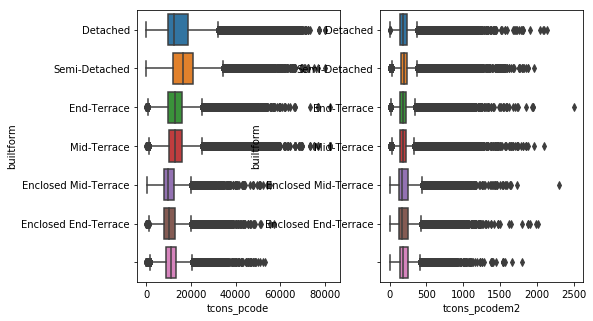

In [471]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

dfrooms['tcons_pcodem2'] = dfrooms.tcons_pcode/dfrooms.tfa
cons = ['tcons_pcode', 'tcons_pcodem2']
cons_ylabels = ['kWh', 'kWh/m2']
# cons_titles = ['gas', 'electricity']

for i in range(2):
    g = sns.boxplot(data=dfrooms, x = dfrooms[cons[i]], y='builtform', ax=ax[i])
#     ax[0].set_xlim(-10000, 80000)   
#     ax[1].set_xlim(-100, 1000)
#     ax[1].set_ylabel('')
#     ax[1].set_yticks([])    
#     ax[i].set_xlabel(cons_ylabels[i])
    
plt.show()

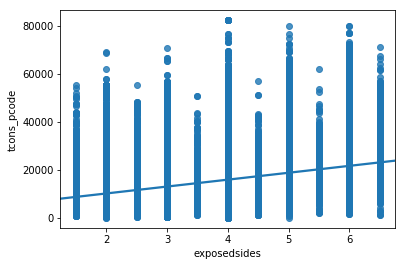

In [474]:
sns.regplot(x=dfrooms.exposedsides, y=dfrooms.tcons_pcode)

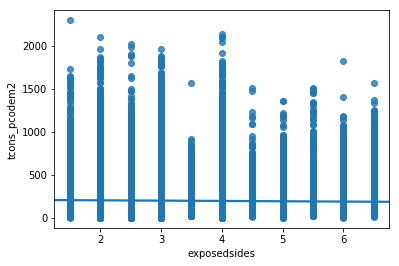

In [475]:
sns.regplot(x=dfrooms.exposedsides, y=dfrooms.tcons_pcodem2)

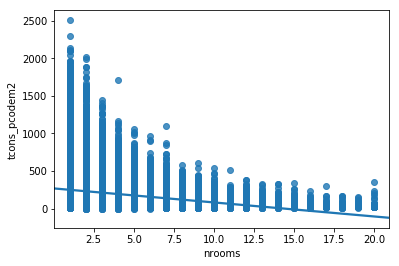

In [476]:
sns.regplot(x=dfrooms.nrooms, y=dfrooms.tcons_pcodem2)

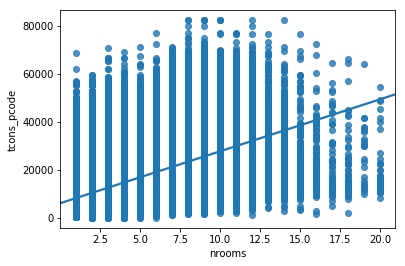

In [477]:
sns.regplot(x=dfrooms.nrooms, y=dfrooms.tcons_pcode)

In [478]:
dfrooms.insp_date.describe()

count        1390182
unique          3278
top       2013-05-15
freq            8773
Name: insp_date, dtype: object